<img src="pics/otus.png">

In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from pandas.tools.plotting import table
from sklearn import datasets

%matplotlib inline
plt.rcParams["figure.figsize"] = [12, 8]

np.random.seed(42)


# Логистическая регрессия

## Задачи машинного обучения
* Обучение с учителем
    * Регрессия
    * Классификация
* Обучение без учителя
    * Кластеризация
    * Снижение размерности
* Обучение с подкреплением

**Обучение с учителем** - есть некоторое количество примеров, для которых известны ответы.
* ответы числа - регрессия
* ответы классы - классификация

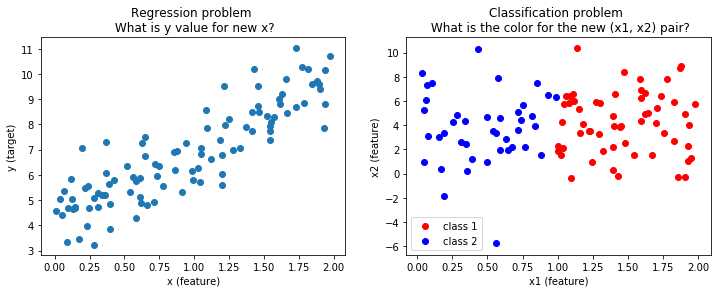

In [2]:
x = 2 * np.random.rand(100, 1)
y = 4 + 3 * x + np.random.randn(100, 1)

fig, ax = plt.subplots(1, 2, figsize=(12, 4))
ax[0].scatter(x, y)
ax[0].set_title("Regression problem \n What is y value for new x?")
ax[0].set_xlabel("x (feature)")
ax[0].set_ylabel("y (target)")

x1 = 2 * np.random.rand(100, 1)
x2 = 4 + 3 * np.random.randn(100, 1)

ax[1].scatter(x1[x1 > 1], x2[x1 > 1], label="class 1", c='r')
ax[1].scatter(x1[x1 <= 1], x2[x1 <= 1], label="class 2", c='b')
ax[1].set_title("Classification problem \n What is the color for the new (x1, x2) pair?")
ax[1].set_xlabel("x1 (feature)")
ax[1].set_ylabel("x2 (feature)")
ax[1].legend()
fig.savefig("pics/supervised.pdf") 

# С учителем - классификация

In [3]:
X, y = datasets.make_classification(n_features=2, n_informative=2, n_redundant=0, n_repeated=0, random_state=1)
X[:5], y[:5]

(array([[ 1.30022717, -0.7856539 ],
        [ 1.44184425, -0.56008554],
        [-0.84792445, -1.36621324],
        [-0.72215015, -1.41129414],
        [-1.27221465,  0.25945106]]), array([1, 1, 0, 0, 0]))

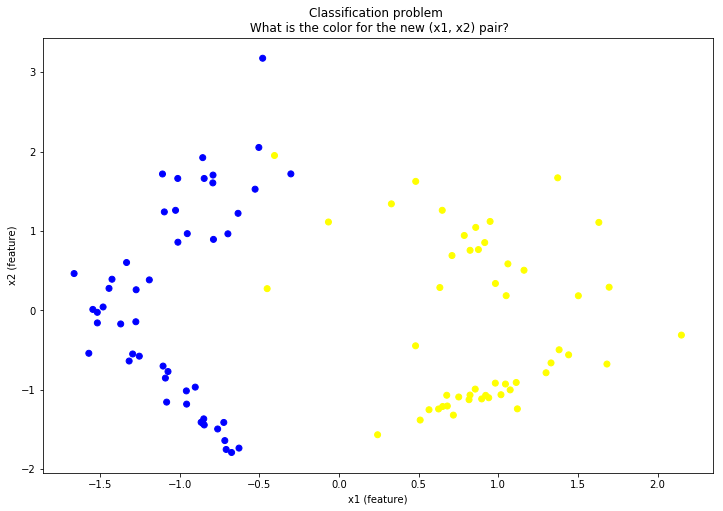

In [4]:
colors = ['yellow' if y_i else 'blue' for y_i in y]
plt.scatter(X[:, 0], X[:, 1], c=colors)
plt.title("Classification problem \n What is the color for the new (x1, x2) pair?")
plt.xlabel("x1 (feature)")
plt.ylabel("x2 (feature)")
plt.savefig('pics/classification.pdf')

Построим случайную прямую. Насколько хорошо она описывает данные?

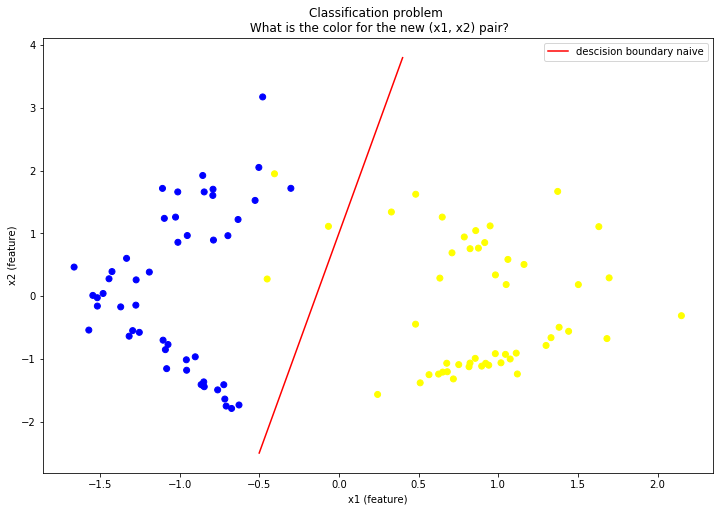

In [5]:
x_naive = np.arange(-0.5, 0.5, 0.1)
y_naive = 7 * x_naive + 1

plt.scatter(X[:, 0], X[:, 1], c=colors)
plt.title("Classification problem \n What is the color for the new (x1, x2) pair?")
plt.xlabel("x1 (feature)")
plt.ylabel("x2 (feature)")
plt.plot(x_naive, y_naive, c='red', label='descision boundary naive')
plt.legend()
plt.savefig('pics/classification_random_line.pdf')


## Как принимается решение

Простой вариант - узнать, с какой стороны от гиперплоскости находится точка

$$\hat{y} = sign(x\theta)$$

In [6]:
w = np.array([7, -1, 1]) # Ax + By + C = 0
     
# Замечание: расстояние от точки (x0, y0) до прямой Ax + By + C это abs(Ax0 + By0 + C) / sqrt(A^2 + B^2)
    
def predict(x, w):
    return np.sign(x.dot(w))

x_pred = np.hstack([np.random.rand(10, 2) * 4 - 2, np.ones(10).reshape(-1, 1)])
y_pred = predict(x_pred, w)

print x_pred.shape
print y_pred.shape

(10, 3)
(10,)


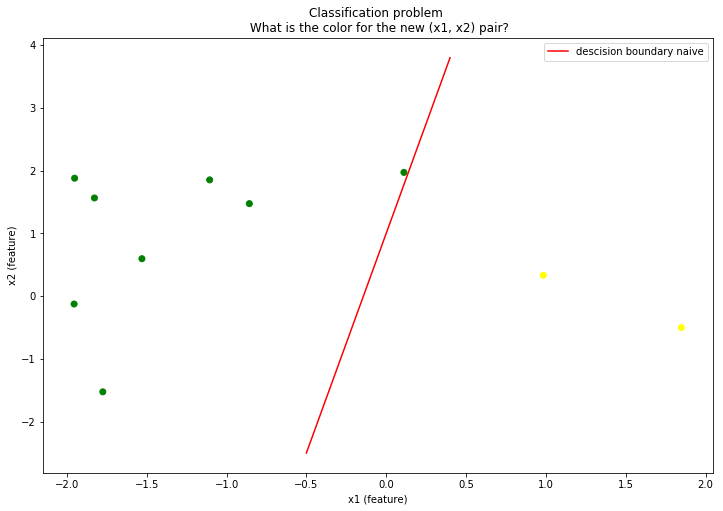

In [7]:
x_naive = np.arange(-0.5, 0.5, 0.1)
y_naive = 7 * x_naive + 1

plt.scatter(x_pred[:, 0], x_pred[:, 1], c=['yellow' if y_i > 0 else 'green' for y_i in y_pred])
plt.title("Classification problem \n What is the color for the new (x1, x2) pair?")
plt.xlabel("x1 (feature)")
plt.ylabel("x2 (feature)")
plt.plot(x_naive, y_naive, c='red', label='descision boundary naive')
plt.legend()
plt.savefig('pics/classification_random_line.pdf')

## Как оценить результат - простой вариант

Отступ (margin) - величина $M_i = y_i \cdot x_i\theta$ (для $y = 1$ или $y = -1$), где $x_i$ - элемент обучающей выборки, $y_i$ - его класс

$$M_i \leq 0 \Rightarrow y_i \neq \hat{y_i}$$
$$M_i > 0 \Rightarrow y_i = \hat{y_i}$$

Функция потерь zero-one loss:
$$ f(x) = \begin{cases}
      1, & \text{если}\space \hat{y} \neq y, \\
      0, & \text{если}\space \hat{y} = y
    \end{cases}
$$ 

Эмпирический риск:
$$Q(\theta, x) = \frac{1}{n} \sum_{i=1}^{n} f(x) = \frac{1}{n} \sum_{i=1}^{n}[M_i < 0]$$

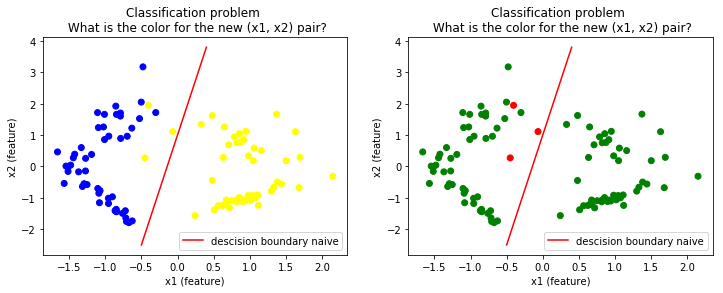

In [8]:
x_pred = np.hstack([X, np.ones(X.shape[0]).reshape(-1, 1)])
y_pred = predict(x_pred, w)
y_pred[y_pred < 0] = 0

fig, ax = plt.subplots(1, 2, figsize=(12, 4))
ax[1].plot(x_naive, y_naive, c='red', label='descision boundary naive')
ax[1].scatter(x_pred[:, 0], x_pred[:, 1], c=['green' if pred else 'red' for pred in y_pred == y])
ax[1].legend()
ax[1].set_title("Classification problem \n What is the color for the new (x1, x2) pair?")
ax[1].set_xlabel("x1 (feature)")
ax[1].set_ylabel("x2 (feature)")

ax[0].scatter(X[:, 0], X[:, 1], c=colors)
ax[0].plot(x_naive, y_naive, c='red', label='descision boundary naive')
ax[0].set_title("Classification problem \n What is the color for the new (x1, x2) pair?")
ax[0].set_xlabel("x1 (feature)")
ax[0].set_ylabel("x2 (feature)")
ax[0].legend()
fig.savefig('pics/classification_error.pdf')

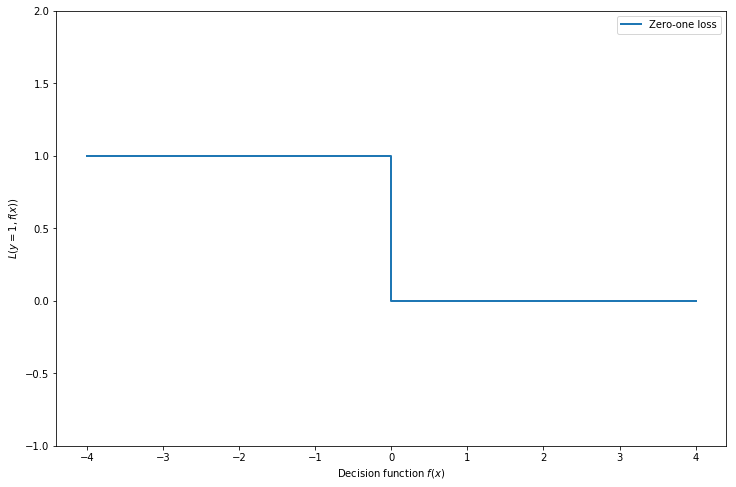

In [9]:
xmin, xmax = -4, 4
xx = np.linspace(xmin, xmax, 100)
lw = 2
plt.plot([xmin, 0, 0, xmax], [1, 1, 0, 0], lw=lw, label="Zero-one loss")
# plt.plot(xx, np.log2(1 + np.exp(-xx)), color='green', lw=lw, label="Log loss")
plt.xlabel(r"Decision function $f(x)$")
plt.legend(loc="upper right")
plt.ylabel("$L(y=1, f(x))$")
plt.ylim((-1, 2))
fig.savefig('pics/zero_one_loss.pdf')

In [10]:
from sklearn.metrics import zero_one_loss

print y
print y_pred
zero_one_loss(y, y_pred)

[1 1 0 0 0 1 1 1 0 1 0 0 1 0 0 1 1 1 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 1 0 0 0
 0 1 1 1 0 0 1 1 1 0 1 0 1 1 0 1 0 0 0 0 1 1 1 1 0 1 1 0 1 1 1 0 0 0 0 1 1
 1 1 0 0 1 1 1 1 0 1 1 0 1 1 1 0 0 1 1 0 1 1 0 0 1 0]
[ 1.  1.  0.  0.  0.  1.  1.  1.  0.  0.  0.  0.  1.  0.  0.  1.  0.  1.
  0.  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  1.  0.  0.  1.  0.  0.
  0.  0.  1.  1.  1.  0.  0.  1.  1.  1.  0.  1.  0.  1.  0.  0.  1.  0.
  0.  0.  0.  1.  1.  1.  1.  0.  1.  1.  0.  1.  1.  1.  0.  0.  0.  0.
  1.  1.  1.  1.  0.  0.  1.  1.  1.  1.  0.  1.  1.  0.  1.  1.  1.  0.
  0.  1.  1.  0.  1.  1.  0.  0.  1.  0.]


0.030000000000000027

## Переформулируем задачу
Вместо класса будем предсказывать вероятность принадлежности классу

$$\hat{p} = \sigma(x\theta) $$

где 

$$\sigma(t)=\frac{1}{1 + exp(-t)}$$

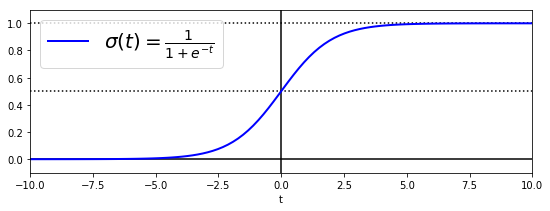

In [11]:
t = np.linspace(-10, 10, 100)
sig = 1 / (1 + np.exp(-t))
plt.figure(figsize=(9, 3))
plt.plot([-10, 10], [0, 0], "k-")
plt.plot([-10, 10], [0.5, 0.5], "k:")
plt.plot([-10, 10], [1, 1], "k:")
plt.plot([0, 0], [-1.1, 1.1], "k-")
plt.plot(t, sig, "b-", linewidth=2, label=r"$\sigma(t) = \frac{1}{1 + e^{-t}}$")
plt.xlabel("t")
plt.legend(loc="upper left", fontsize=20)
plt.axis([-10, 10, -0.1, 1.1])
plt.savefig("pics/logistic_function_plot.pdf")
plt.show()

# Предсказание

$$ y = \begin{cases}
      0, & \text{если}\space \hat{p} < 0.5, \\
      1, & \text{если}\space \hat{p} \geq 0.5
    \end{cases}
$$    


## Оценка одного элемента выборки

$$ Q(\theta, x_i) = \begin{cases}
      -log(\hat{p}), & \text{если}\space y = 1, \\
      -log(1-\hat{p}), & \text{если}\space y=0 
    \end{cases}
$$    



## Для многих элементов выборки (log loss)

$$ Q(\theta, x) = - \frac{1}{m}\sum_{i=1}^{n}[y_i \log (\hat{p}_i) + (1-y_i)log(1-\hat{p}_i)]$$


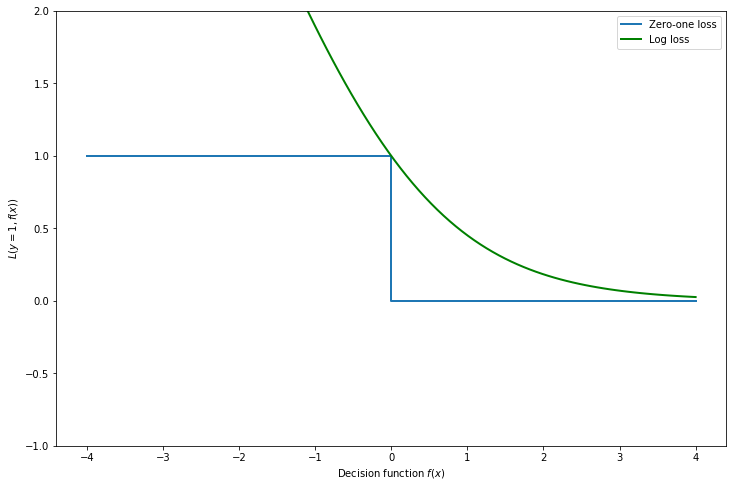

In [12]:
xmin, xmax = -4, 4
xx = np.linspace(xmin, xmax, 100)
lw = 2
plt.plot([xmin, 0, 0, xmax], [1, 1, 0, 0], lw=lw, label="Zero-one loss")
plt.plot(xx, np.log2(1 + np.exp(-xx)), color='green', lw=lw, label="Log loss")
plt.xlabel(r"Decision function $f(x)$")
plt.legend(loc="upper right")
plt.ylabel("$L(y=1, f(x))$")
plt.ylim((-1, 2))
plt.savefig("pics/logloss.pdf")

## В sklearn

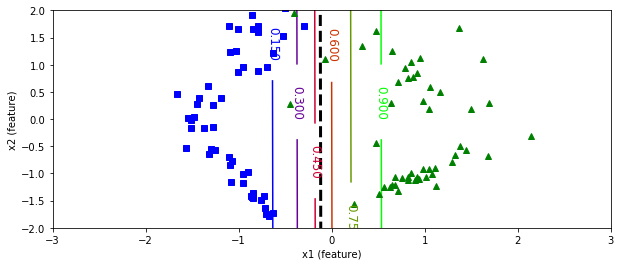

In [13]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(X, y)

x0, x1 = np.meshgrid(
        np.linspace(-2, 2, 500).reshape(-1, 1),
        np.linspace(-3, 3, 200).reshape(-1, 1),
    )
X_new = np.c_[x0.ravel(), x1.ravel()]

y_proba = log_reg.predict_proba(X_new)


plt.figure(figsize=(10, 4))
plt.plot(X[y==0, 0], X[y==0, 1], "bs")
plt.plot(X[y==1, 0], X[y==1, 1], "g^")
zz = y_proba[:, 1].reshape(x0.shape)
contour = plt.contour(x0, x1, zz, cmap=plt.cm.brg)
left_right = np.array([-3, 3])
boundary = -(log_reg.coef_[0][0] * left_right + log_reg.intercept_[0]) / log_reg.coef_[0][1]
plt.clabel(contour, inline=1, fontsize=12)
plt.plot(left_right, boundary, "k--", linewidth=3)
plt.xlabel("x1 (feature)")
plt.ylabel("x2 (feature)")
plt.axis([-3, 3, -2, 2])
plt.savefig("pics/descision.pdf")
plt.show()


## Мультиклассовая регрессия

Для обучения модели предсказывать $K$ классов можно натренировать $K$ классификаторов 1 против всех (one vs rest) и при предсказании брать максимальное значение. Вероятности нормализуются. Или $K(K-1)/2$ классификаторов one vs one.

Рассмотрим другой способ - softmax.

Нам необходимо получить значения для $k$ классов - составим матрицу параметров $\Theta$


$$ x = \begin{bmatrix} 1 & x_{11} & ... & x_{p1} \\ 1 & x_{12} & ... & x_{p2} \\ ... & ... & ... & ... \\ 1 & x_{n1} & ... & x_{n1}
\end{bmatrix} \quad 
\Theta = \begin{bmatrix} \theta_{01} &  ... & \theta_{0k} \\ \theta_{11} & ... & \theta_{1k} \\ ... & ... & ... \\ \theta_{p1} & ... & \theta_{pk} \end{bmatrix} \quad 
f = \begin{bmatrix} f_{01} &  ... & f_{0k} \\ f_{11} & ... & f_{1k} \\ ... & ... & ... \\ f_{n1} & ... & f_{nk}\end{bmatrix} $$

## Softmax

$$ \hat{p}_k = \frac{e^{x\theta_k}}{\sum_{j=1}^K e^{x\theta_j}} $$

$$ \hat{y}_k = {argmax}_k \hat{p}_k$$

## Оценка для случая многих классов - cross entropy

$$Q(\Theta, x) = - \frac{1}{n}\sum_{i=1}^{n}\sum_{k=1}^{K} y_{ik} \log \hat{p}_{ik}$$

In [14]:
from sklearn import linear_model, datasets
iris = datasets.load_iris()

X = iris.data[:, :2]  # we only take the first two features.
Y = iris.target

print X[:10]
print np.unique(Y)

logreg = linear_model.LogisticRegression(C=1e5)

logreg.fit(X, Y)

[[ 5.1  3.5]
 [ 4.9  3. ]
 [ 4.7  3.2]
 [ 4.6  3.1]
 [ 5.   3.6]
 [ 5.4  3.9]
 [ 4.6  3.4]
 [ 5.   3.4]
 [ 4.4  2.9]
 [ 4.9  3.1]]
[0 1 2]


LogisticRegression(C=100000.0, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [15]:
print logreg.coef_

[[-30.61879527  27.54963779]
 [  0.14041199  -3.21392459]
 [  2.60373147  -0.74348327]]


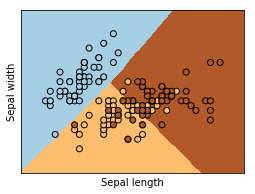

In [16]:
h = .02  # step size in the mesh
# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = logreg.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1, figsize=(4, 3))
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)

# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=Y, edgecolors='k', cmap=plt.cm.Paired)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())
plt.savefig("pics/iris.pdf")
plt.show()


In [17]:
Z = logreg.predict_proba(np.c_[xx.ravel(), yy.ravel()])
np.set_printoptions(precision=3, suppress=True)
print Z[:10]
print logreg.coef_
print logreg.intercept_

[[ 0.489  0.509  0.002]
 [ 0.476  0.522  0.002]
 [ 0.454  0.544  0.003]
 [ 0.418  0.579  0.003]
 [ 0.365  0.631  0.004]
 [ 0.296  0.7    0.004]
 [ 0.219  0.776  0.005]
 [ 0.148  0.846  0.005]
 [ 0.093  0.901  0.006]
 [ 0.055  0.938  0.007]]
[[-30.619  27.55 ]
 [  0.14   -3.214]
 [  2.604  -0.743]]
[ 77.737   8.024 -14.198]


# Градиентный спуск



<img src="pics/grad.png">

Метод градиентного спуска заключается в итеративном и одновременном обновлении значений $\theta$ в направлении, противоположному градиенту:
$$ \theta := \theta - \alpha\frac{\partial L}{\partial \theta}$$

* $\alpha$ -  скорость спуска


Посчитаем, чему равен градиент функции потерь $RSS(\theta)$

$$ RSS = \mathcal{L}(\theta) = (\hat{y} - y)^2 $$

$$ \frac{\partial L}{\partial \theta_i} = 2(\hat{y} - y)\frac{\partial L}{\partial \theta_i}(\hat{y} - y) = 2(\hat{y} - y)\frac{\partial L}{\partial \theta_i}(\theta_0x_0 + ... + \theta_1x_1 - y) = 2(\hat{y} - y)\cdot x_i$$

$$ \theta_i:= \theta_i - \alpha(\hat{y} - y)\cdot x_i$$

Или:
$$ \frac{\partial RSS(\theta)}{\partial \theta_i} = 2\sum_{i=1}^{n}(\theta^T\cdot x_i - y_i)x_i$$

$$\nabla_\theta RSS(\theta) = \left( \begin{matrix} \frac{\partial L}{\partial \theta_0} \\ \frac{\partial L}{\partial \theta_1} \\ ... \\ \frac{\partial L}{\partial \theta_p} \end{matrix} \right) = x^\top(x\theta - y)$$


Для MSE:
$$ \frac{\partial L}{\partial \theta} = \frac{1}{n} X^\top(X\theta - y)$$

In [18]:
np.random.seed(42)
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * x + np.random.randn(100, 1)

In [19]:
lin_reg = LinearRegression()
lin_reg.fit(X, y)
lin_reg.intercept_, lin_reg.coef_

(array([ 4.215]), array([[ 2.77]]))

In [20]:
theta_best = np.vstack([lin_reg.intercept_, lin_reg.coef_.ravel()])

In [21]:
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new]  # add x0 = 1 to each instance
y_predict = X_new_b.dot(theta_best)
y_predict

array([[ 4.215],
       [ 9.755]])

## Псевдокод алгоритма

```{python}
1.function gd(X, alpha, epsilon):
2.    initialise theta 
3.    do: 
4.        theta = new_theta
5.        new_theta = theta - alpha * grad(X, theta)
6.    until dist(new_theta, theta) < epsilon
7.    return theta
```

In [22]:
X_b = np.c_[np.ones((100, 1)), X]

alpha = 0.1
n_iterations = 1000
m = 100
theta = np.random.randn(2,1)
eps = 0.0001
for iteration in range(n_iterations):
    gradients = 2. / m * X_b.T.dot(X_b.dot(theta) - y)
    theta_old = theta
    theta = theta - alpha * gradients
    dist = np.linalg.norm(theta - theta_old)
    if dist < eps:
        break
        
print iteration, dist

193 9.86249315403e-05


In [23]:
theta

array([[ 4.213],
       [ 2.772]])

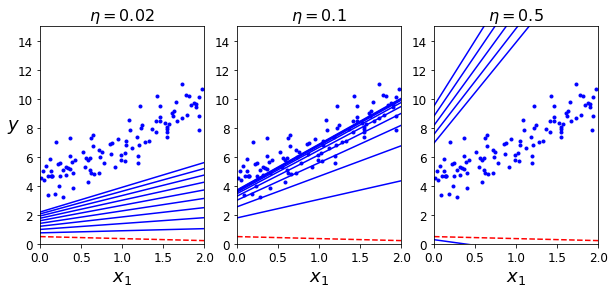

In [24]:
def plot_gd_examples():
    plt.rcParams['axes.labelsize'] = 14
    plt.rcParams['xtick.labelsize'] = 12
    plt.rcParams['ytick.labelsize'] = 12
    theta_path_bgd = []

    def plot_gradient_descent(theta, eta, theta_path=None):
        m = len(X_b)
        plt.plot(X, y, "b.")
        n_iterations = 1000
        for iteration in range(n_iterations):
            if iteration < 10:
                y_predict = X_new_b.dot(theta)
                style = "b-" if iteration > 0 else "r--"
                plt.plot(X_new, y_predict, style)
            gradients = 2. / m * X_b.T.dot(X_b.dot(theta) - y)
            theta = theta - eta * gradients
            if theta_path is not None:
                theta_path.append(theta)
        plt.xlabel("$x_1$", fontsize=18)
        plt.axis([0, 2, 0, 15])
        plt.title(r"$\eta = {}$".format(eta), fontsize=16)

    np.random.seed(42)
    theta = np.random.randn(2,1)  

    plt.figure(figsize=(10,4))
    plt.subplot(131); plot_gradient_descent(theta, eta=0.02)
    plt.ylabel("$y$", rotation=0, fontsize=18)
    plt.subplot(132); plot_gradient_descent(theta, eta=0.1, theta_path=theta_path_bgd)
    plt.subplot(133); plot_gradient_descent(theta, eta=0.5)
    plt.savefig("pics/step.pdf")
    plt.show()
    
plot_gd_examples()

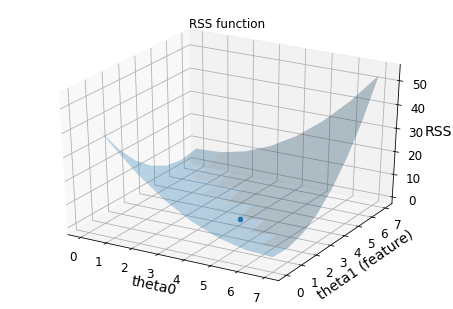

In [25]:
from sklearn.metrics import mean_squared_error
from mpl_toolkits.mplot3d import Axes3D

%matplotlib inline
fig=plt.figure()
ax = Axes3D(fig)

t1_surfs = np.arange(0, 8, 1)
t2_surfs = np.arange(0, 8, 1)
t1_surf, t2_surf = np.meshgrid(t1_surfs, t2_surfs)
t = np.c_[np.ravel(t1_surf), np.ravel(t2_surf)]
x_b = np.c_[x, np.ones(x.shape[0])]
zs = np.array([mean_squared_error(x_b.dot(t_i.reshape(-1, 1)), y) for t_i in t])
z = zs.reshape(t1_surf.shape)
ax.plot_surface(t2_surf, t1_surf, z, alpha=0.3)

ax.scatter(theta[0], theta[1], mean_squared_error(x_b.dot(theta), y) , marker='o')

ax.set_title("RSS function")
ax.set_xlabel("theta0")
ax.set_ylabel("theta1 (feature)")
ax.set_zlabel("RSS")
plt.savefig('pics/error_function.pdf')

plt.show()


## Стохастический градиентный спуск


Проблема - используется вся обучающая выборка на каждом шаге алгоритма  
Решение - использовать один случайный элемент выборки

### Градиентный спуск

```{python}
1.function gd(X, alpha, epsilon):
2.    initialise theta 
3.    do: 
4.        theta = new_theta
5.        new_theta = theta - alpha * grad(X, theta)
6.    until dist(new_theta, theta) < epsilon
7.    return theta
```

### Стохастический градиентный спуск

```{python}
1.function sgd(X, alpha, epsilon):
2. 	initialise theta 
3. 	do: 
4.        X = shuffle(X)
5.        for x in X:
6.            theta = new_theta
7.            new_theta = theta - alpha * grad(x, theta)
8.	until dist(new_theta, theta) < epsilon
9.	return theta
```

In [26]:
m = len(X_b)
alpha = 0.01
n_epochs = 100
t0, t1 = 5., 50  # learning schedule hyperparameters

theta = np.random.randn(2,1)  # random initialization

for epoch in range(n_epochs):
    p = np.random.permutation(m)
    for idx in p:

        random_index = np.random.randint(m)
        xi = X_b[[idx], :]
        yi = y[[idx], :]
        
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        theta = theta - alpha * gradients
        
print theta

[[ 4.207]
 [ 2.755]]


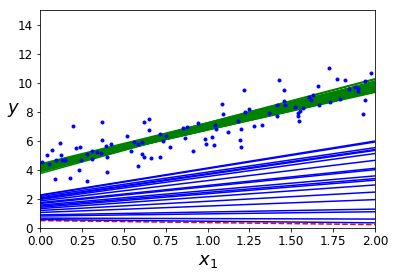

In [27]:
theta_path_sgd = []
m = len(X_b)
np.random.seed(42)
alpha = 0.01
n_epochs = 100
t0, t1 = 5., 50  # learning schedule hyperparameters

theta = np.random.randn(2,1)  # random initialization

for epoch in range(n_epochs):
    for i in range(m):
        if epoch == 0 and i < 20:                    
            y_predict = X_new_b.dot(theta)           
            style = "b-" if i > 0 else "r--"         
            plt.plot(X_new, y_predict, style)        
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        theta = theta - alpha * gradients
        theta_path_sgd.append(theta)  
        
    y_predict = X_new_b.dot(theta)   
    plt.plot(X_new, y_predict, 'g-')

plt.plot(X, y, "b.")                                 
plt.xlabel("$x_1$", fontsize=18)                     
plt.ylabel("$y$", rotation=0, fontsize=18)           
plt.axis([0, 2, 0, 15])                              
plt.savefig('pics/sgd_plot.pdf')                              
plt.show()

## Упражнение

Найти формулы для градиентного спуска для линейной регрессии с регуляризацией

# Градиентный спуск для логистической регрессии

## Бинарная классификация, log loss

$$ Q(\theta, x) = - \frac{1}{m}\sum_{i=1}^{n}[y_i \log (\hat{p}_i) + (1-y_i)log(1-\hat{p}_i)]$$

$$ \frac{\partial Q(\theta_j, x)}{\partial \theta_i} = \frac{1}{n} \sum_{i=1}^{n}(\sigma(\theta^T\cdot x_i) - y_i)x_ij$$

## cross entropy

$$Q(\Theta, x) = - \frac{1}{n}\sum_{i=1}^{n}\sum_{k=1}^{K} y_{ik} \log \hat{p}_{ik}$$


$$\nabla_{\theta_k}  Q(\Theta, x) = \frac{1}{n} \sum_{i=1}^{n} (\hat{p}_{ki} - y_{ki})x_i $$

In [28]:
X = iris.data[:, :2]  # we only take the first two features.
Y = iris.target

print X[:10]
print np.unique(Y)

softmax_reg = LogisticRegression(multi_class="multinomial", solver="lbfgs", C=10)
softmax_reg.fit(X, Y.ravel())

[[ 5.1  3.5]
 [ 4.9  3. ]
 [ 4.7  3.2]
 [ 4.6  3.1]
 [ 5.   3.6]
 [ 5.4  3.9]
 [ 4.6  3.4]
 [ 5.   3.4]
 [ 4.4  2.9]
 [ 4.9  3.1]]
[0 1 2]


LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='multinomial',
          n_jobs=1, penalty='l2', random_state=None, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

In [29]:
print softmax_reg.coef_
print softmax_reg.intercept_

[[-5.124  4.592]
 [ 1.663 -2.567]
 [ 3.461 -2.025]]
[ 13.901  -0.556 -13.344]


In [30]:
print logreg.coef_
print logreg.intercept_

[[-30.619  27.55 ]
 [  0.14   -3.214]
 [  2.604  -0.743]]
[ 77.737   8.024 -14.198]


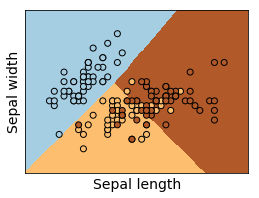

In [31]:
h = .02  # step size in the mesh
# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = logreg.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1, figsize=(4, 3))
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)

# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=Y, edgecolors='k', cmap=plt.cm.Paired)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())
plt.show()

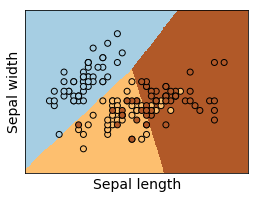

In [32]:
h = .02  # step size in the mesh
# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = softmax_reg.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1, figsize=(4, 3))
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)

# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=Y, edgecolors='k', cmap=plt.cm.Paired)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())
plt.savefig('pics/irissm.pdf') 
plt.show()

# Линейно неразделимый случай


In [33]:
from sklearn.preprocessing import PolynomialFeatures

In [34]:
n_samples = 1500
x, y = datasets.make_circles(n_samples=n_samples, factor=.5, noise=noise)
plt.scatter(x[:,0], x[:,1], c=y)
plt.savefig('pics/circles.pdf') 
plt.show()

NameError: name 'noise' is not defined

In [ ]:
def plot_boundary(clf, X, y, grid_step=.01, poly_featurizer=None):
    x_min, x_max = X[:, 0].min() - .1, X[:, 0].max() + .1
    y_min, y_max = X[:, 1].min() - .1, X[:, 1].max() + .1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, grid_step),
    np.arange(y_min, y_max, grid_step))
    Z = clf.predict(poly_featurizer.transform(np.c_[xx.ravel(), yy.ravel()]))
    Z = Z.reshape(xx.shape)
    
    print xx.shape, yy.shape, Z.shape
    plt.contour(xx, yy, Z, cmap=plt.cm.Paired)

In [ ]:
def plot_log_reg(noise, c):
    n_samples = 1500
    x, y = datasets.make_circles(n_samples=n_samples, factor=.5, noise=noise)
    poly_features = PolynomialFeatures(degree=2, include_bias=False)
    X_poly = poly_features.fit_transform(x)
    logit = LogisticRegression(C=c)
    logit.fit(X_poly, y)
    plot_boundary(logit, x, y, grid_step=.01, poly_featurizer=poly_features)
    plt.scatter(x[:,0], x[:,1], c=y)
    plt.savefig('pics/circles{}{}'.format(noise, c).replace('.', '') + '.pdf') 
    plt.show()

In [ ]:
noise = .05
plot_log_reg(noise, 0.001)
plot_log_reg(noise, 0.01)
plot_log_reg(noise, 0.1)
plot_log_reg(noise, 1)


In [ ]:
noise = .20
plot_log_reg(noise, 0.001)
plot_log_reg(noise, 0.01)
plot_log_reg(noise, 0.1)
plot_log_reg(noise, 1)
plot_log_reg(noise, 10000)
